### AI Lab -  Assignment 3 - CH22M503

#### Author - Aloy Banerjee
###### Roll No. CH22M503

### Question:
##### Please use the dataset provided for the previous assignment. You have to work only with the file with
##### your roll number specified on it. Each dataset has 6 features x1, x2, ..., x6 and 3 targets y1, y2, y3.
###### Q1 For the given dataset, implement a Ridge Regression model 
###### Q2 Use Lasso Regression to fit the given dataset 
###### Q3 Report on the effect of the regularization term (α) on the value of coefficients and performance of the models 
###### Q4 Compare both models and elaborate on your findings 

#### Reference used 

In [229]:
#https://machinelearningcompass.com/machine_learning_models/ridge_regression/
#https://machinelearningcompass.com/machine_learning_models/lasso_regression/

#### Importing Library

In [230]:
#Import library 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import Ridge,Lasso

sns.set(context="notebook", palette="Spectral", style="darkgrid", font_scale=1.0, color_codes=True,rc={'figure.figsize':(14,10)})

#### Common variable declaration

In [231]:
workingDir = 'E:\\Document\\M-Tech\\M-Tech Class\\2nd Trimester\\Assignment\\AI Lab\\Assignment 3\\Datasets'
dataset_fileName = 'ch22m503.csv'
alpha_iter = [100,10,1,0,0.01,0.001,0.00001,0.0000000001]
df_analyzer = []

#### Common function

In [232]:
def standardize(input_data):
    sc=StandardScaler()
    return sc.fit_transform(input_data)

def analyze_performance(alpha, X, Y, typeofData):
    sc = StandardScaler()
    display(f'====================alpha value : {alpha}======================')
    #Ridge Regression
    ridge_regression= Ridge(alpha = alpha,fit_intercept=True,random_state = 42,max_iter= 150)
    ridge_model = Pipeline([('standardize', sc),('RidgeRegression', ridge_regression)])
    ridge_model.fit(X, Y)
    print('Ridge Intercept', ridge_model[1].intercept_, sep=':')
    print('Ridge Coefficient', ridge_model[1].coef_, sep=':')
    r_output_predicted_train = ridge_model.predict(X)
    RMSE_ridge = np.sqrt(mean_squared_error(Y,r_output_predicted_train))
    RSquared_ridge = r2_score(Y,r_output_predicted_train)
    print(f'Ridge - RMSE : {RMSE_ridge}')
    print(f'Ridge - RSquared : {RSquared_ridge}')
    fig, ax = plt.subplots()
    sns.barplot(x=[1,2,3,4,5,6], y = ridge_model[1].coef_[0], color='cornflowerblue')
    sns.barplot(x=[1,2,3,4,5,6], y = ridge_model[1].coef_[1], color='yellow')
    sns.barplot(x=[1,2,3,4,5,6], y = ridge_model[1].coef_[2], color='red')
    ax.set_title('Values of the coefficients - Ridge', size=15)
    plt.show()
      
    df_intermediate_ridge = {'Alpha':alpha,'Type of Regression':'Ridge','TypeofData':typeofData,'RMSE':RMSE_ridge,'RSquared':RSquared_ridge,'Coefficient_Y1':ridge_model[1].coef_[0],'Coefficient_Y2':ridge_model[1].coef_[1],'Coefficient_Y3':ridge_model[1].coef_[2]}
    df_analyzer.append(df_intermediate_ridge)
    
    #Lasso Regression
    sc = StandardScaler()
    lasso_regression = Lasso(alpha = alpha,fit_intercept=True,random_state = 42,max_iter= 150)
    lasso_model = Pipeline([('standardize', sc),('LassoRegression', lasso_regression)])
    lasso_model.fit(X, Y)
    print('Lasso Intercept', lasso_model[1].intercept_, sep=':')
    print('Lasso Coefficient', lasso_model[1].coef_, sep=':')
    l_output_predicted_train = lasso_model.predict(X)
    RMSE_lasso = np.sqrt(mean_squared_error(Y,l_output_predicted_train))
    RSquared_lasso = r2_score(Y,l_output_predicted_train)
    print(f'Lasso - RMSE : {RMSE_lasso}')
    print(f'Lasso - RSquared : {RSquared_lasso}')
    fig, ax = plt.subplots()
    sns.barplot(x=[1,2,3,4,5,6], y = lasso_model[1].coef_[0], color='cornflowerblue')
    sns.barplot(x=[1,2,3,4,5,6], y = lasso_model[1].coef_[1], color='yellow')
    sns.barplot(x=[1,2,3,4,5,6], y = lasso_model[1].coef_[2], color='red')
    ax.set_title('Values of the coefficients - Lasso', size=15)  
    plt.show()
    
      
    df_intermediate_lasso = {'Alpha':alpha,'Type of Regression':'Lasso','TypeofData':typeofData,'RMSE':RMSE_lasso,'RSquared':RSquared_lasso,'Coefficient_Y1':lasso_model[1].coef_[0],'Coefficient_Y2':lasso_model[1].coef_[1],'Coefficient_Y3':lasso_model[1].coef_[2]}
    df_analyzer.append(df_intermediate_lasso)
   

##### Loading Dataset

In [233]:
#Change the working directory 
os.chdir(workingDir)
#Load the data
dataset = pd.read_csv(dataset_fileName)

##### Display info of dataset

In [234]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y1      300 non-null    float64
 1   y2      300 non-null    float64
 2   y3      300 non-null    float64
 3   x1      300 non-null    float64
 4   x2      300 non-null    float64
 5   x3      300 non-null    float64
 6   x4      300 non-null    float64
 7   x5      300 non-null    float64
 8   x6      300 non-null    float64
dtypes: float64(9)
memory usage: 21.2 KB


None

##### Display statistical information of each column of dataset 

In [235]:
display(dataset.describe())

,y1,y2,y3,x1,x2,x3,x4,x5,x6
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.971704,1.894681,1.938561,-0.000556,0.001934,-0.000120,0.004810,0.000395,-0.002939
std,6.712703,4.496053,3.968322,0.047096,0.050554,0.050415,0.041201,0.035499,0.031131
min,-18.071698,-13.808136,-9.571848,-0.143030,-0.147243,-0.184994,-0.103076,-0.090455,-0.096776
25%,-2.169525,-1.299587,-0.494731,-0.030571,-0.034597,-0.038382,-0.026517,-0.026435,-0.022263
50%,1.607958,1.912733,1.621601,-0.001074,0.003144,0.003498,0.005663,0.001777,-0.001468
75%,6.334674,5.076724,4.417613,0.033125,0.040575,0.035981,0.030797,0.023777,0.018341
max,23.005748,13.527036,14.078908,0.160984,0.144788,0.122464,0.135587,0.085364,0.091987


##### Display the given dataset 

In [236]:
display(dataset)

,y1,y2,y3,x1,x2,x3,x4,x5,x6
0,4.032059,4.380135,2.466634,0.000837,0.001992,0.031592,-0.033059,-0.004093,0.001486
1,3.940345,4.276451,2.457723,-0.002535,0.004551,0.029849,0.025805,0.030363,-0.017328
2,13.427120,11.876140,6.802207,0.023598,0.042402,0.107008,-0.020884,0.022644,-0.020999
3,-0.595405,-0.400295,0.783955,0.011311,-0.020204,-0.022805,0.052265,-0.030691,0.015796
4,-0.660072,0.637356,0.515951,-0.049540,0.013128,-0.011487,-0.024079,0.037111,-0.025304
...,...,...,...,...,...,...,...,...,...
295,-6.480876,-4.391700,-2.152671,-0.030116,-0.033487,-0.060712,0.003858,-0.025873,0.035290
296,-1.752936,0.068624,-0.471807,0.006568,-0.042976,-0.006432,0.014582,-0.054451,-0.005245
297,3.862183,6.299373,1.507590,-0.035834,0.001830,0.063450,-0.009888,0.015747,-0.091078
298,2.071755,0.373426,3.238364,-0.074970,0.084574,-0.039531,-0.055545,-0.009055,-0.033014


##### Checking for null or na values in data set 

In [237]:
dataset.isnull().isna().values.any()

False

In [238]:
Q1_input_x_all = dataset[['x1','x2','x3','x4','x5','x6']]
Q1_output_y_all = dataset[['y1','y2','y3']] 

##### Train and test split for data set 

In [239]:
X_train, X_test, Y_train, Y_test= train_test_split(Q1_input_x_all, Q1_output_y_all, test_size=0.2, random_state=42)

In [240]:
display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(240, 6)

(60, 6)

(240, 3)

(60, 3)

###### Q1 For the given dataset, implement a Ridge Regression model 

In [241]:
#Creating pipeline for Ridge Regression 
sc = StandardScaler()
alpha = 0.005
ridge_regression= Ridge(alpha = alpha,fit_intercept=True,random_state = 42,max_iter= 150)
ridge_model = Pipeline([('standardize', sc),('RidgeRegression', ridge_regression)])
#Fit the model in training data 
ridge_model.fit(X_train, Y_train)
print('Ridge Intercept', ridge_model[1].intercept_, sep=':')
print('Ridge Coefficient', ridge_model[1].coef_, sep=':')

Ridge Intercept:[2.11635531 1.96561687 2.0244219 ]
Ridge Coefficient:[[ 2.78410674e+00  4.20118418e+00  3.27892798e+00 -9.27486975e-06
   3.48506106e-05  2.10679191e-05]
 [ 7.15194486e-01  1.61736535e+00  4.09016988e+00 -1.86200831e-05
   1.18285698e-05 -5.43618358e-06]
 [ 1.85096180e+00  2.90706436e+00  7.81767200e-01 -4.29069476e-07
   2.57581119e-05  2.00890374e-05]]


##### Ridge regression performance measure

In [242]:
r_output_predicted_train = ridge_model.predict(X_train)
print(f'Ridge - RMSE (Training Set) : {np.sqrt(mean_squared_error(Y_train,r_output_predicted_train))}')
print(f'Ridge - RSquared (Training Set) : {r2_score(Y_train,r_output_predicted_train)}')

r_output_predicted_test = ridge_model.predict(X_test)
print(f'Ridge - RMSE (Test Set) : {np.sqrt(mean_squared_error(Y_test,r_output_predicted_test))}')
print(f'Ridge - RSquared (Test Set) : {r2_score(Y_test,r_output_predicted_test)}')


Ridge - RMSE (Training Set) : 9.983274436658125e-05
Ridge - RSquared (Training Set) : 0.9999999996203791
Ridge - RMSE (Test Set) : 0.00010110335365165753
Ridge - RSquared (Test Set) : 0.9999999995976259


#### Both the training and test set are performing well with approx 99% accuracy, after fitting the ridge regression

###### Q2 Use Lasso Regression to fit the given dataset 

In [243]:
#Creating pipeline for Ridge Regression 
alpha = 0.005
sc = StandardScaler()
lasso_regression = Lasso(alpha = alpha,fit_intercept=True,random_state = 42,max_iter= 150)
lasso_model = Pipeline([('standardize', sc),('LassoRegression', lasso_regression)])
#Fit the model in training data 
lasso_model.fit(X_train, Y_train)
print('Lasso Intercept', lasso_model[1].intercept_, sep=':')
print('Lasso Coefficient', lasso_model[1].coef_, sep=':')

Lasso Intercept:[2.11635531 1.96561687 2.0244219 ]
Lasso Coefficient:[[ 2.78151214  4.19655012  3.27437547 -0.          0.          0.        ]
 [ 0.71254178  1.61268189  4.08565115 -0.          0.          0.        ]
 [ 1.84832197  2.9024113   0.7771739  -0.          0.          0.        ]]


##### Lasso regression performance measure

In [244]:
l_output_predicted_train = lasso_model.predict(X_train)
print(f'Lasso - RMSE (Training Set) : {np.sqrt(mean_squared_error(Y_train,l_output_predicted_train))}')
print(f'Lasso - RSquared (Training Set) : {r2_score(Y_train,l_output_predicted_train)}')

l_output_predicted_test = lasso_model.predict(X_test)
print(f'Lasso - RMSE (Test Set) : {np.sqrt(mean_squared_error(Y_test,l_output_predicted_test))}')
print(f'Lasso - RSquared (Test Set) : {r2_score(Y_test,l_output_predicted_test)}')

Lasso - RMSE (Training Set) : 0.007733936960135869
Lasso - RSquared (Training Set) : 0.9999973079147111
Lasso - RMSE (Test Set) : 0.007811895885243732
Lasso - RSquared (Test Set) : 0.9999971081571383


#### Both the training and test set are performing well with approx 99% accuracy, after fitting the ridge regression.

###### Q3 Report on the effect of the regularization term (α) on the value of coefficients and performance of the models 

#### Performance measure for different alpha values on training set 

'====================alpha value : 100======================'

Ridge Intercept:[2.11635531 1.96561687 2.0244219 ]
Ridge Coefficient:[[ 2.3476519   2.87637568  2.35731954 -0.07329886  0.2839202   0.21174966]
 [ 0.86833992  1.02108891  2.82582653 -0.13306976  0.08369078 -0.02039184]
 [ 1.46796639  2.01944287  0.60357282 -0.01017812  0.21613478  0.186506  ]]
Ridge - RMSE : 1.3582166999841792
Ridge - RSquared : 0.9304915816619745


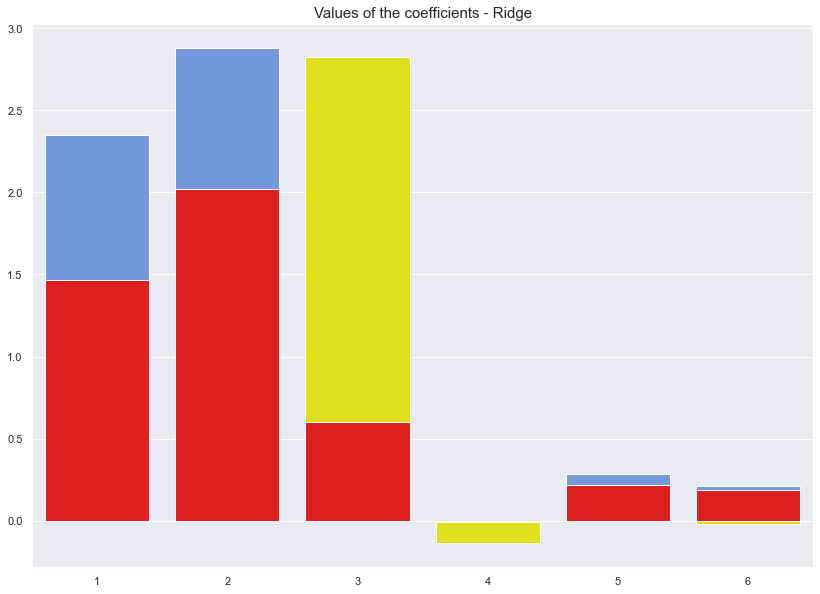

Lasso Intercept:[2.11635531 1.96561687 2.0244219 ]
Lasso Coefficient:[[ 0.  0.  0. -0.  0.  0.]
 [ 0.  0.  0. -0.  0.  0.]
 [ 0.  0.  0. -0.  0.  0.]]
Lasso - RMSE : 5.193783923814553
Lasso - RSquared : 3.700743415417188e-17


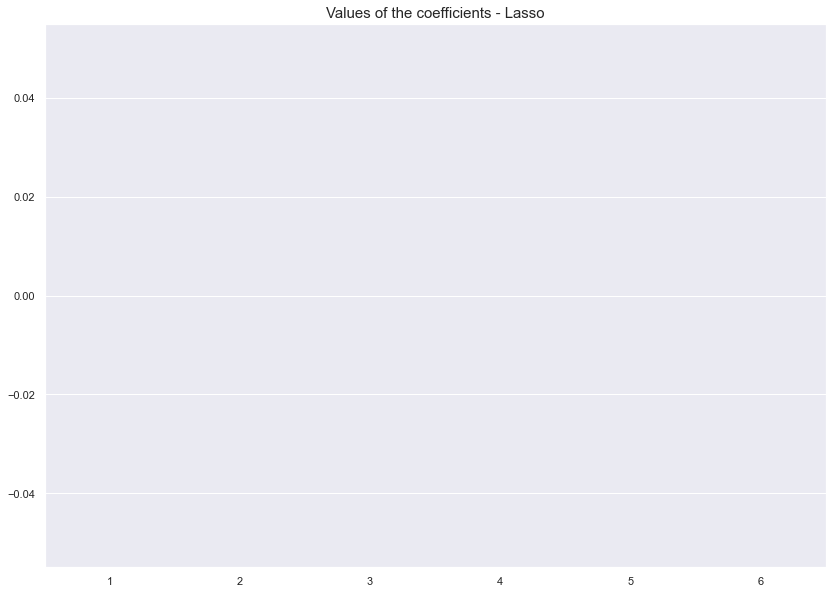

'====================alpha value : 10======================'

Ridge Intercept:[2.11635531 1.96561687 2.0244219 ]
Ridge Coefficient:[[ 2.75010080e+00  3.99958107e+00  3.14980136e+00 -1.63763148e-02
   6.21702158e-02  3.88161532e-02]
 [ 7.65429407e-01  1.51888151e+00  3.90576595e+00 -3.25976827e-02
   2.06767664e-02 -8.97658578e-03]
 [ 1.80785234e+00  2.77482023e+00  7.59088889e-01 -9.02970835e-04
   4.61571177e-02  3.65487581e-02]]
Ridge - RMSE : 0.18969048990338863
Ridge - RSquared : 0.9986316970802083


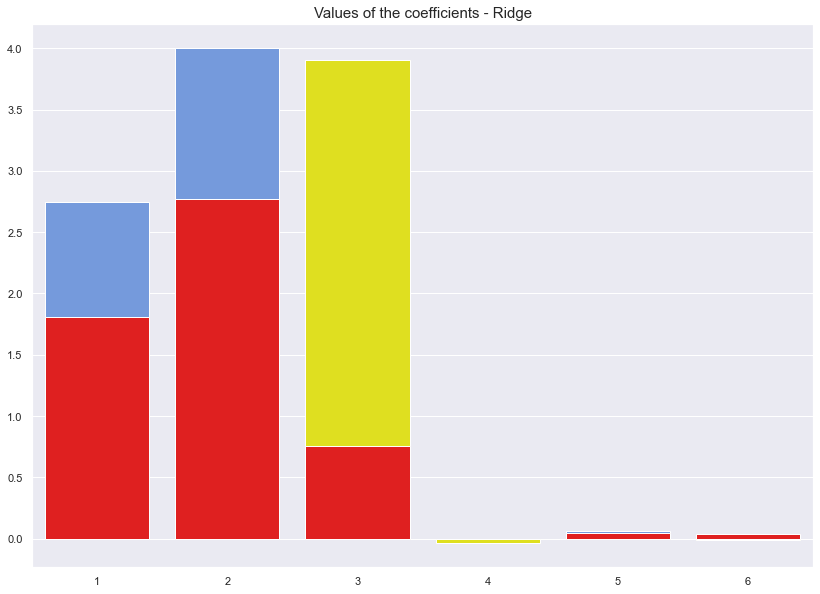

Lasso Intercept:[2.11635531 1.96561687 2.0244219 ]
Lasso Coefficient:[[ 0.  0.  0. -0.  0.  0.]
 [ 0.  0.  0. -0.  0.  0.]
 [ 0.  0.  0. -0.  0.  0.]]
Lasso - RMSE : 5.193783923814553
Lasso - RSquared : 3.700743415417188e-17


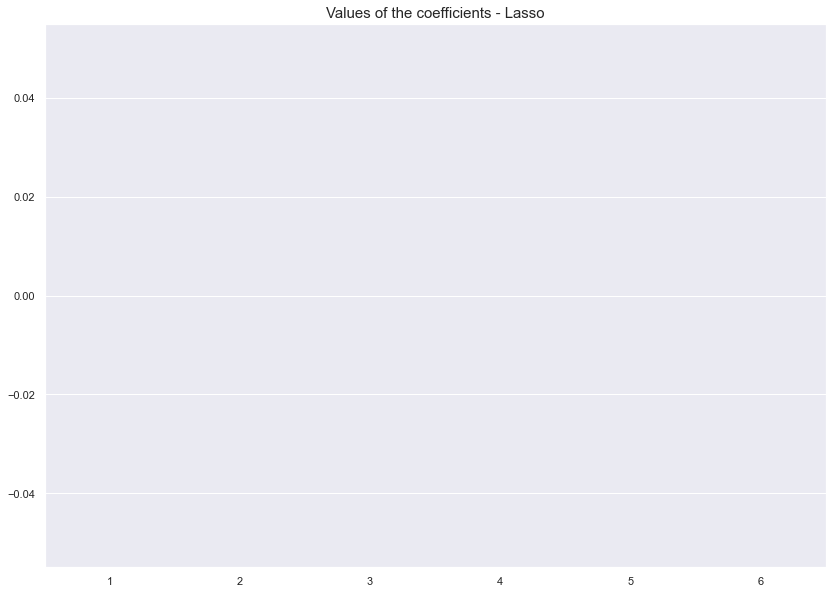

'====================alpha value : 1======================'

Ridge Intercept:[2.11635531 1.96561687 2.0244219 ]
Ridge Coefficient:[[ 2.78105373e+00  4.17990987e+00  3.26548237e+00 -1.83116859e-03
   6.88872236e-03  4.17858514e-03]
 [ 7.20938543e-01  1.60683280e+00  4.07085579e+00 -3.67330271e-03
   2.33312679e-03 -1.06625310e-03]
 [ 1.84666508e+00  2.89316159e+00  7.79437948e-01 -8.62663752e-05
   5.09387330e-03  3.97910686e-03]]
Ridge - RMSE : 0.019860646604688954
Ridge - RSquared : 0.9999849783955135


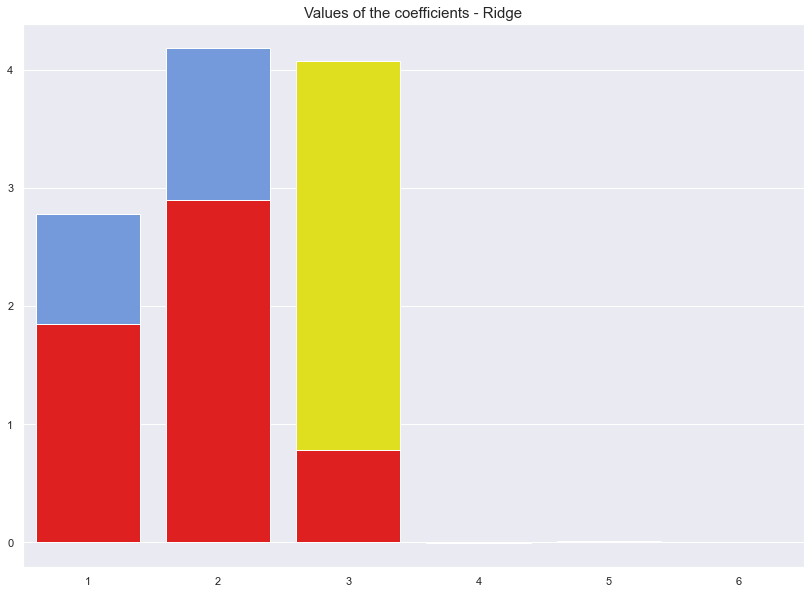

Lasso Intercept:[2.11635531 1.96561687 2.0244219 ]
Lasso Coefficient:[[ 2.24798134  3.25798624  2.35913432 -0.          0.          0.        ]
 [ 0.17902064  0.67411457  3.17040712 -0.          0.          0.        ]
 [ 1.2728534   1.98298137  0.         -0.          0.          0.        ]]
Lasso - RMSE : 1.525856024099488
Lasso - RSquared : 0.8966788253695834


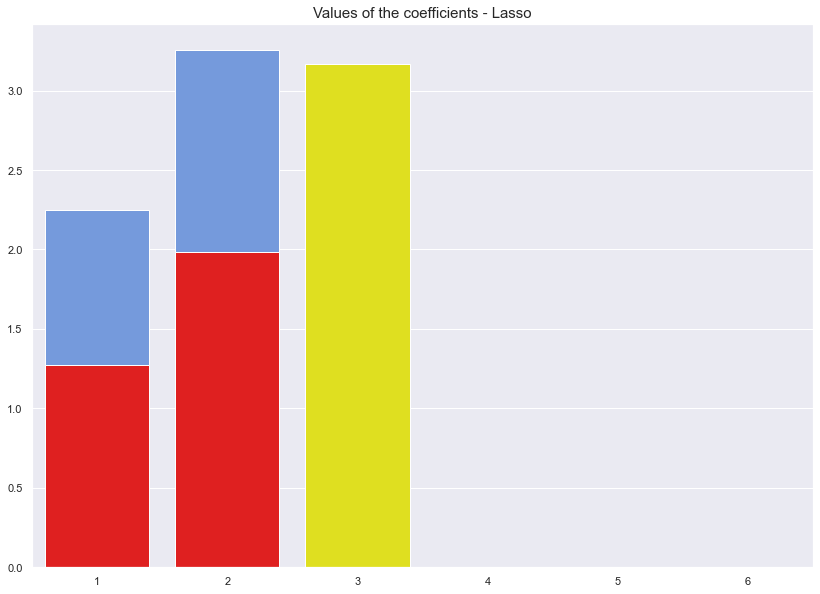

'====================alpha value : 0======================'

Ridge Intercept:[2.11635531 1.96561687 2.0244219 ]
Ridge Coefficient:[[ 2.78412187e+00  4.20129181e+00  3.27899589e+00 -4.92108586e-16
  -1.67616475e-15 -2.86024894e-15]
 [ 7.15165162e-01  1.61741872e+00  4.09026750e+00 -3.33971629e-16
  -3.08674279e-16 -8.99122441e-16]
 [ 1.85098338e+00  2.90713467e+00  7.81778947e-01 -4.12670963e-16
  -1.22513850e-15 -1.97047983e-15]]
Ridge - RMSE : 4.49353809531638e-15
Ridge - RSquared : 1.0


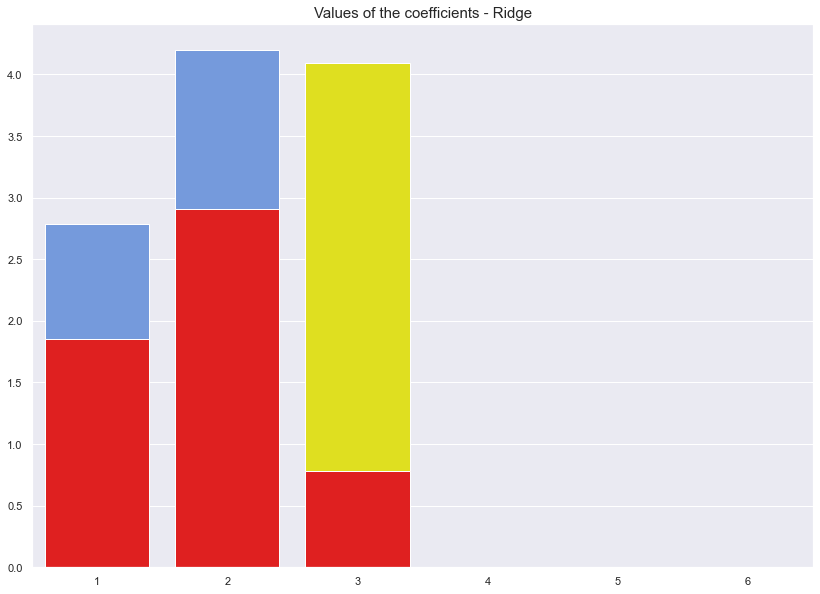

Lasso Intercept:[2.11635531 1.96561687 2.0244219 ]
Lasso Coefficient:[[ 2.78431060e+00  4.20119440e+00  3.27892534e+00 -5.64352921e-05
   2.92042115e-05 -3.39233903e-05]
 [ 7.15325835e-01  1.61733543e+00  4.09020762e+00 -4.78174897e-05
   2.51081600e-05 -2.87335214e-05]
 [ 1.85106770e+00  2.90709135e+00  7.81747338e-01 -2.53302060e-05
   1.29167494e-05 -1.52311422e-05]]
Lasso - RMSE : 0.00013442750866350114
Lasso - RSquared : 0.9999999993437861


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


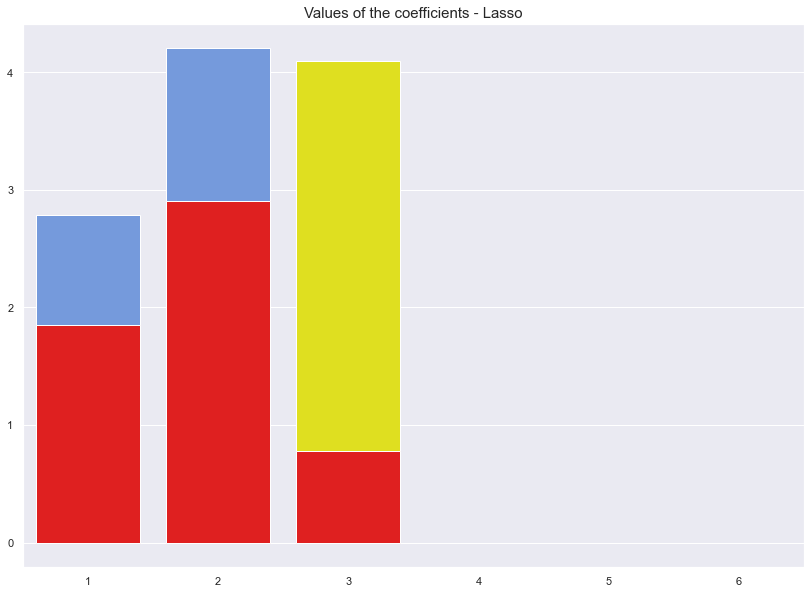

'====================alpha value : 0.01======================'

Ridge Intercept:[2.11635531 1.96561687 2.0244219 ]
Ridge Coefficient:[[ 2.78409161e+00  4.20107655e+00  3.27886006e+00 -1.85485300e-05
   6.96970921e-05  4.21340681e-05]
 [ 7.15223806e-01  1.61731198e+00  4.09007225e+00 -3.72375904e-05
   2.36554844e-05 -1.08712998e-05]
 [ 1.85094021e+00  2.90699406e+00  7.81755453e-01 -8.58161656e-07
   5.15132955e-05  4.01761147e-05]]
Ridge - RMSE : 0.00019966012723228324
Ridge - RSquared : 0.999999998481599


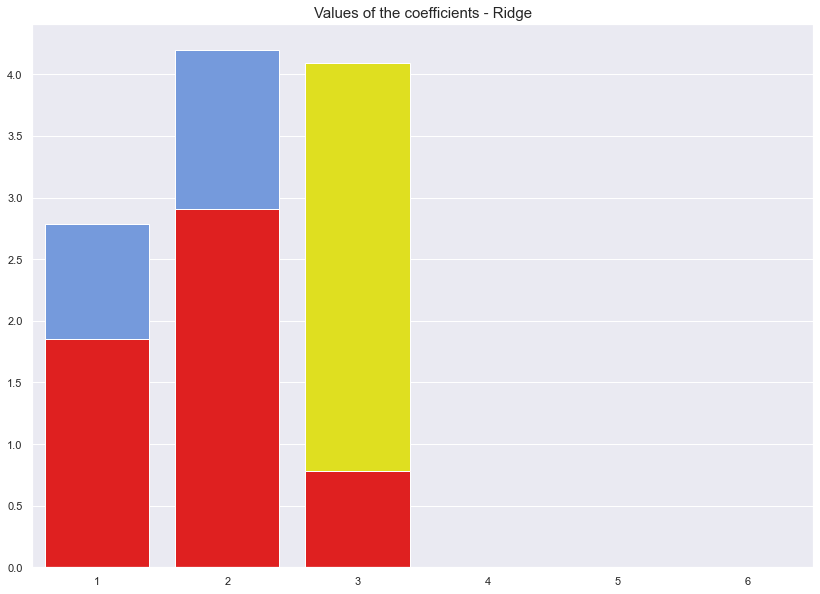

Lasso Intercept:[2.11635531 1.96561687 2.0244219 ]
Lasso Coefficient:[[ 2.77880938  4.19184141  3.26978273 -0.          0.          0.        ]
 [ 0.70983956  1.60797297  4.08105824 -0.          0.          0.        ]
 [ 1.84563505  2.89769697  0.77257644 -0.          0.          0.        ]]
Lasso - RMSE : 0.015482387372814042
Lasso - RSquared : 0.9999892145674876


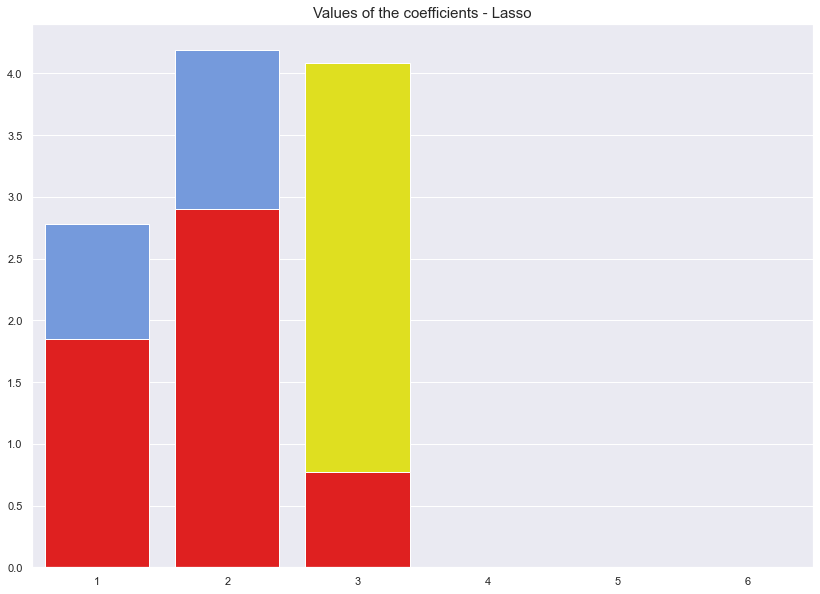

'====================alpha value : 0.001======================'

Ridge Intercept:[2.11635531 1.96561687 2.0244219 ]
Ridge Coefficient:[[ 2.78411884e+00  4.20127028e+00  3.27898231e+00 -1.85507072e-06
   6.97045249e-06  4.21372544e-06]
 [ 7.15171027e-01  1.61740805e+00  4.09024798e+00 -3.72422271e-06
   2.36584640e-06 -1.08732212e-06]
 [ 1.85097907e+00  2.90712061e+00  7.81776598e-01 -8.58120790e-08
   5.15185668e-06  4.01796429e-06]]
Ridge - RMSE : 1.996697782142461e-05
Ridge - RSquared : 0.9999999999848145


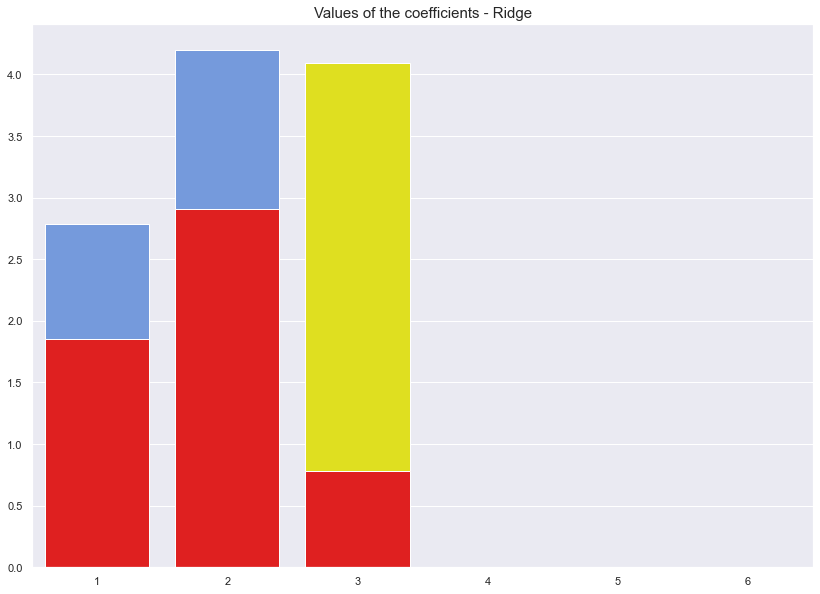

Lasso Intercept:[2.11635531 1.96561687 2.0244219 ]
Lasso Coefficient:[[ 2.78361917  4.20033655  3.27806608 -0.          0.          0.        ]
 [ 0.71465371  1.61646661  4.08934029 -0.          0.          0.        ]
 [ 1.85045622  2.90618819  0.78085642 -0.          0.          0.        ]]
Lasso - RMSE : 0.001544141869940012
Lasso - RSquared : 0.9999998926223116


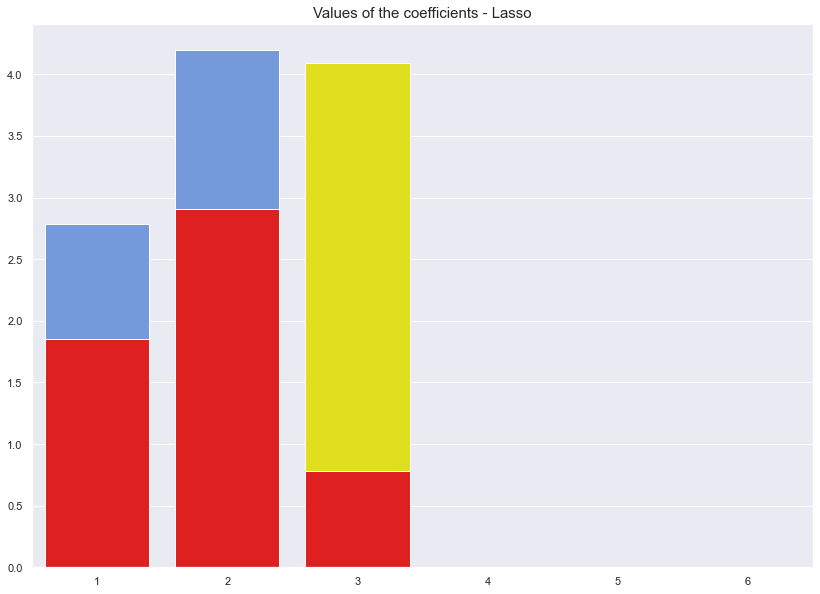

'====================alpha value : 1e-05======================'

Ridge Intercept:[2.11635531 1.96561687 2.0244219 ]
Ridge Coefficient:[[ 2.78412184e+00  4.20129159e+00  3.27899576e+00 -1.85509477e-08
   6.97053417e-08  4.21376022e-08]
 [ 7.15165221e-01  1.61741862e+00  4.09026731e+00 -3.72427374e-08
   2.36587918e-08 -1.08734333e-08]
 [ 1.85098334e+00  2.90713453e+00  7.81778924e-01 -8.58116965e-10
   5.15191460e-08  4.01800292e-08]]
Ridge - RMSE : 1.996708386971649e-07
Ridge - RSquared : 0.9999999999999986


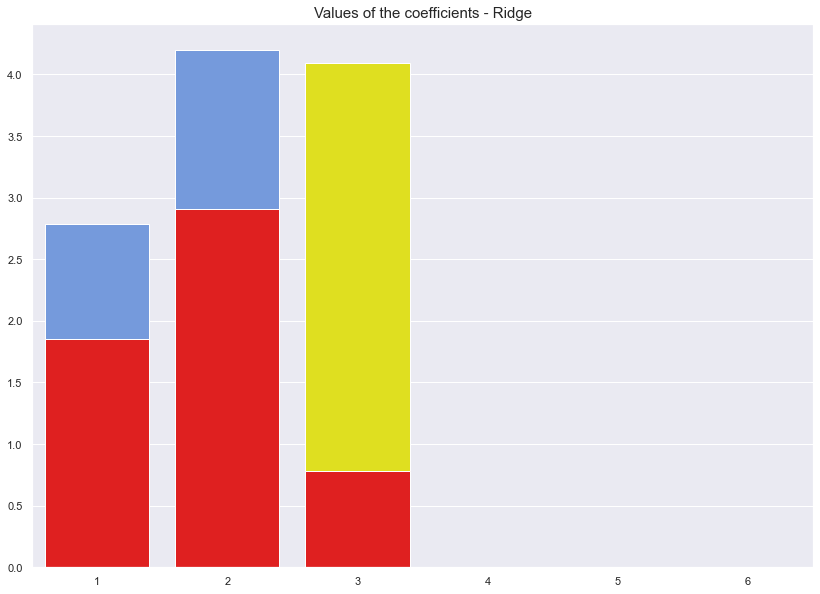

Lasso Intercept:[2.11635531 1.96561687 2.0244219 ]
Lasso Coefficient:[[ 2.78429735e+00  4.20118815e+00  3.27892006e+00 -4.37750808e-05
   2.33635047e-05 -1.87431849e-05]
 [ 7.15312584e-01  1.61732918e+00  4.09020234e+00 -3.51572784e-05
   1.92674532e-05 -1.35533161e-05]
 [ 1.85105444e+00  2.90708510e+00  7.81742058e-01 -1.26699946e-05
   7.07604258e-06 -5.09368900e-08]]
Lasso - RMSE : 0.00012847797706327504
Lasso - RSquared : 0.9999999994034746


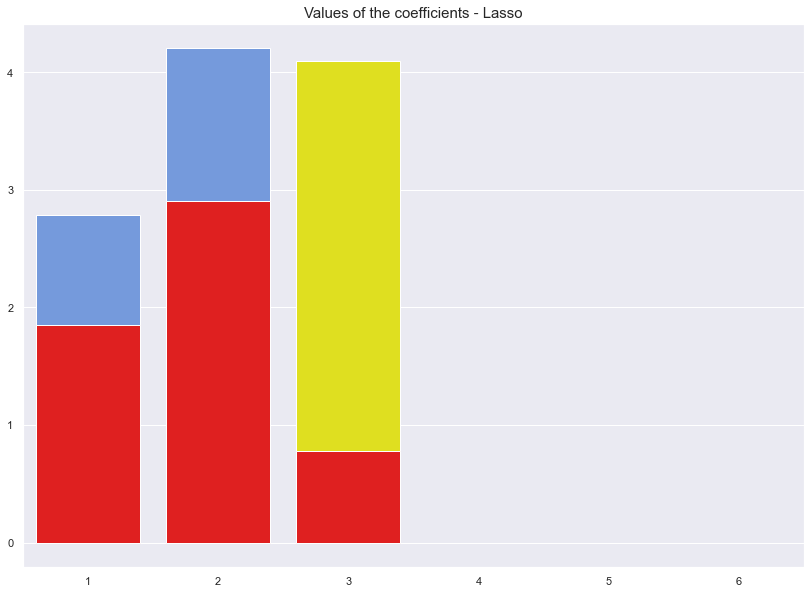

'====================alpha value : 1e-10======================'

Ridge Intercept:[2.11635531 1.96561687 2.0244219 ]
Ridge Coefficient:[[ 2.78412187e+00  4.20129181e+00  3.27899589e+00 -1.86549889e-13
   6.95524024e-13  4.18528485e-13]
 [ 7.15165162e-01  1.61741872e+00  4.09026750e+00 -3.72980958e-13
   2.36480816e-13 -1.09777043e-13]
 [ 1.85098338e+00  2.90713467e+00  7.81778947e-01 -9.07272900e-15
   5.14037180e-13  3.99829967e-13]]
Ridge - RMSE : 1.9955176877372734e-12
Ridge - RSquared : 1.0


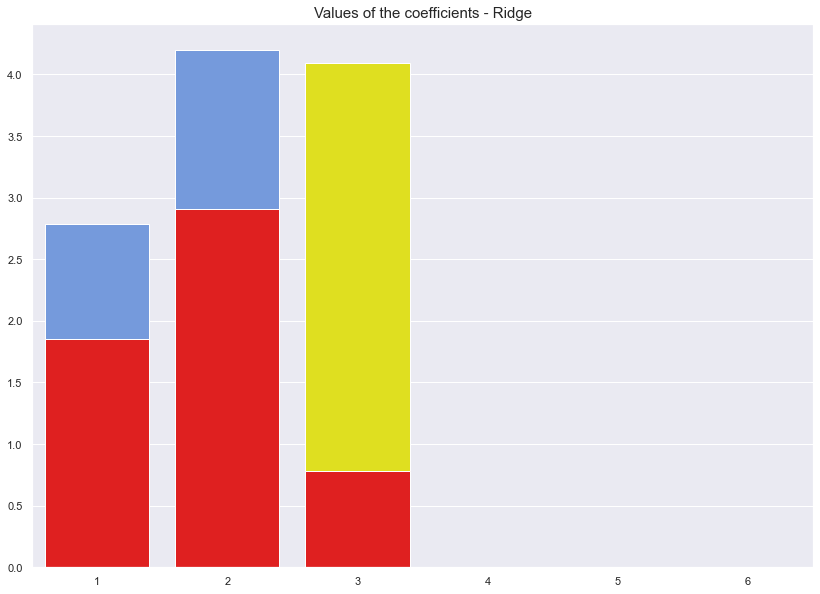

Lasso Intercept:[2.11635531 1.96561687 2.0244219 ]
Lasso Coefficient:[[ 2.78431060e+00  4.20119439e+00  3.27892534e+00 -5.64351655e-05
   2.92041530e-05 -3.39232385e-05]
 [ 7.15325835e-01  1.61733543e+00  4.09020762e+00 -4.78173631e-05
   2.51081016e-05 -2.87333696e-05]
 [ 1.85106770e+00  2.90709135e+00  7.81747338e-01 -2.53300794e-05
   1.29166909e-05 -1.52309904e-05]]
Lasso - RMSE : 0.0001344274287402102
Lasso - RSquared : 0.9999999993437868


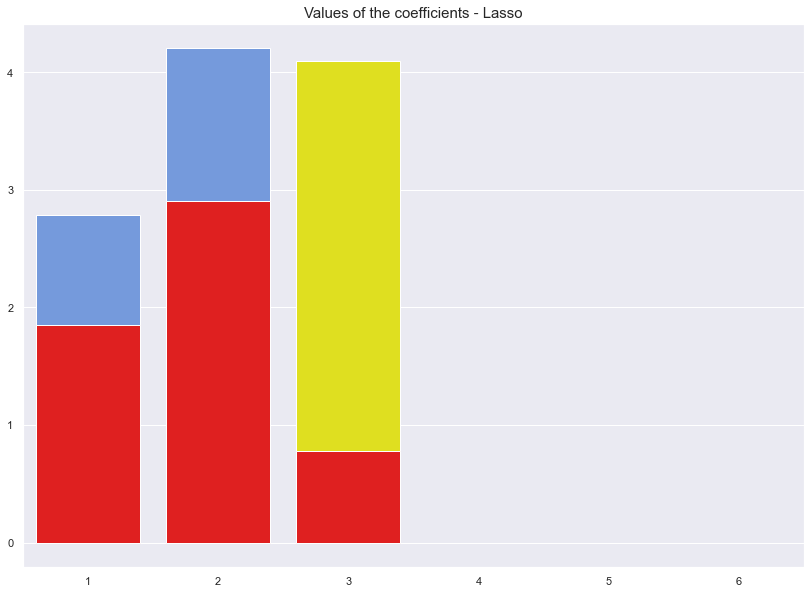

In [245]:
for alpha in alpha_iter:
    analyze_performance(alpha, X_train, Y_train,'train')

#### Performance measure for different alpha values on test set 

'====================alpha value : 100======================'

Ridge Intercept:[1.39309795 1.61093896 1.59511783]
Ridge Coefficient:[[ 1.41015806  1.74104691  1.21764291 -0.38568853  0.19856049  0.28022744]
 [ 0.55249629  0.72772193  1.2223792  -0.21890756  0.03088725  0.05178383]
 [ 0.88493279  1.15423936  0.43192672 -0.23570868  0.15980757  0.21489366]]
Ridge - RMSE : 2.674475757067424
Ridge - RSquared : 0.72399769481782


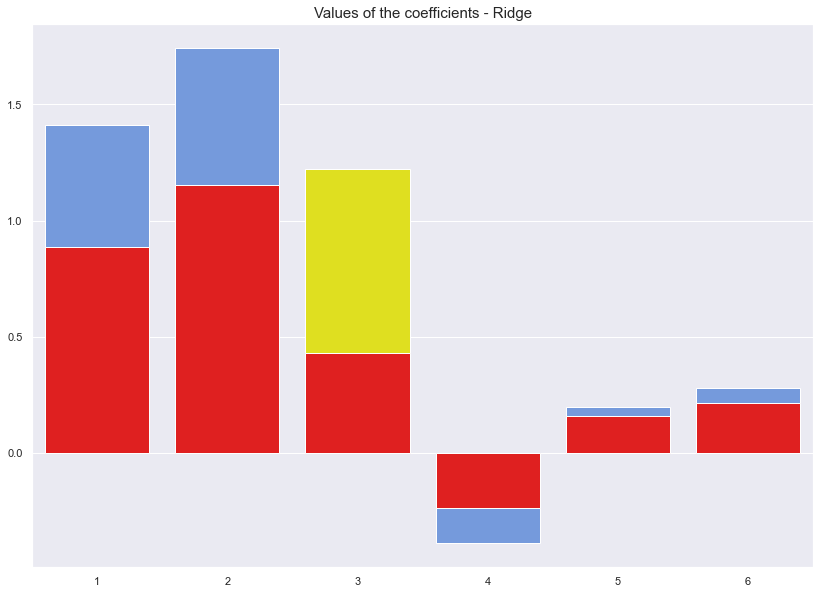

Lasso Intercept:[1.39309795 1.61093896 1.59511783]
Lasso Coefficient:[[ 0.  0.  0. -0.  0.  0.]
 [ 0.  0.  0. -0.  0.  0.]
 [ 0.  0.  0. -0.  0.  0.]]
Lasso - RMSE : 5.144272350294941
Lasso - RSquared : 3.700743415417188e-17


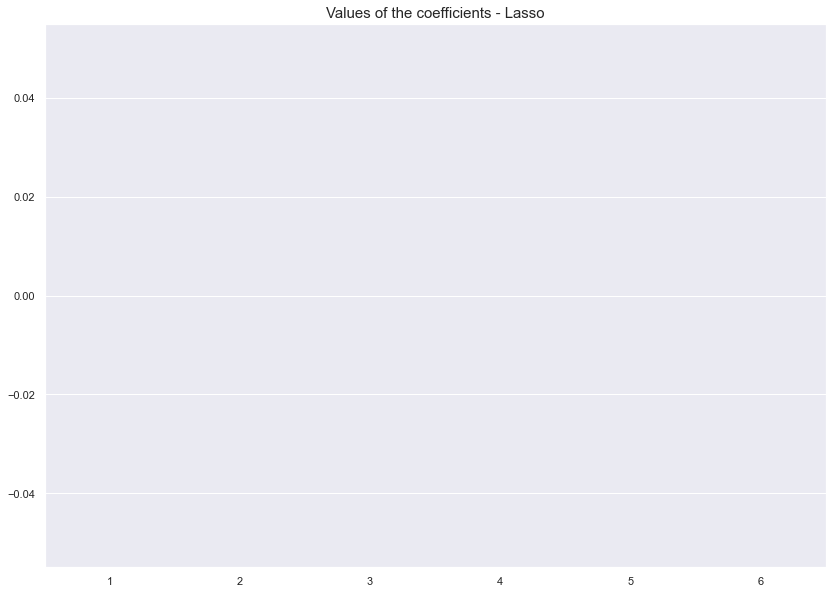

'====================alpha value : 10======================'

Ridge Intercept:[1.39309795 1.61093896 1.59511783]
Ridge Coefficient:[[ 2.42810261e+00  3.59915085e+00  2.23978974e+00 -2.03156652e-01
   9.37831327e-02  1.31199617e-01]
 [ 7.33787697e-01  1.40746108e+00  2.64200994e+00 -1.26295922e-01
   1.78344752e-04  6.24824998e-03]
 [ 1.58535280e+00  2.46621603e+00  6.05855783e-01 -1.22140142e-01
   8.31541899e-02  1.09733084e-01]]
Ridge - RMSE : 0.5655192586728401
Ridge - RSquared : 0.9873181955230295


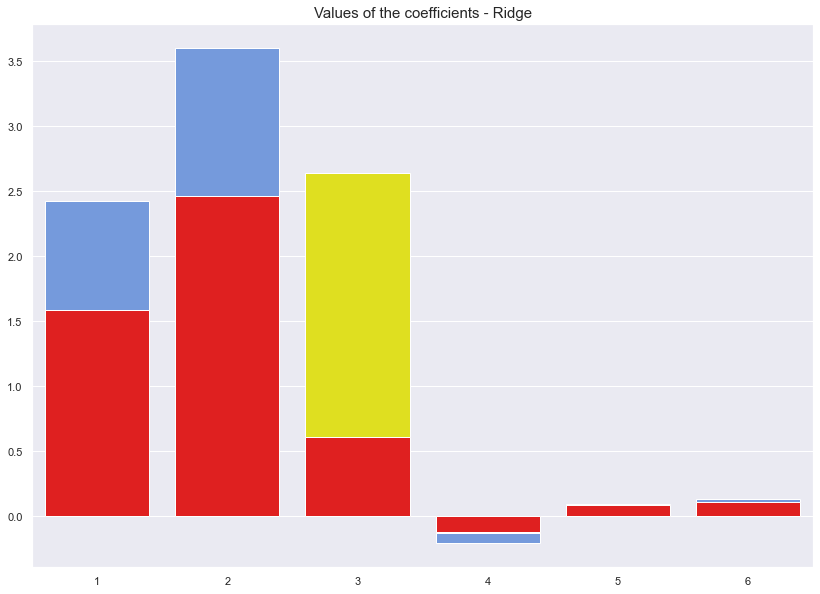

Lasso Intercept:[1.39309795 1.61093896 1.59511783]
Lasso Coefficient:[[ 0.  0.  0. -0.  0.  0.]
 [ 0.  0.  0. -0.  0.  0.]
 [ 0.  0.  0. -0.  0.  0.]]
Lasso - RMSE : 5.144272350294941
Lasso - RSquared : 3.700743415417188e-17


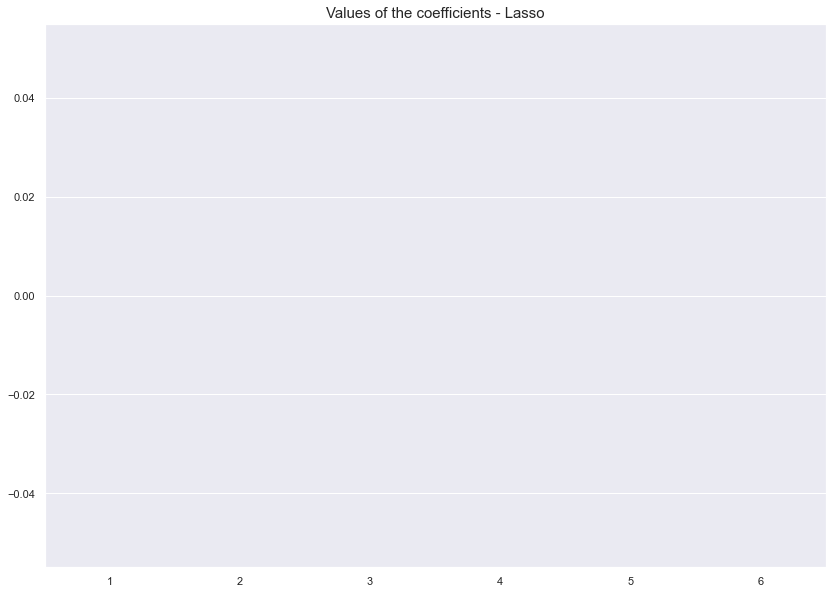

'====================alpha value : 1======================'

Ridge Intercept:[1.39309795 1.61093896 1.59511783]
Ridge Coefficient:[[ 2.54805764e+00  4.16501294e+00  2.43929019e+00 -2.81967576e-02
   1.24877385e-02  1.72333758e-02]
 [ 6.69945496e-01  1.60594074e+00  3.02251044e+00 -1.79520539e-02
  -4.82353609e-04  1.35898624e-04]
 [ 1.69008972e+00  2.87886236e+00  5.91136842e-01 -1.68824771e-02
   1.13373198e-02  1.47639335e-02]]
Ridge - RMSE : 0.0660940585544365
Ridge - RSquared : 0.9998257303907586


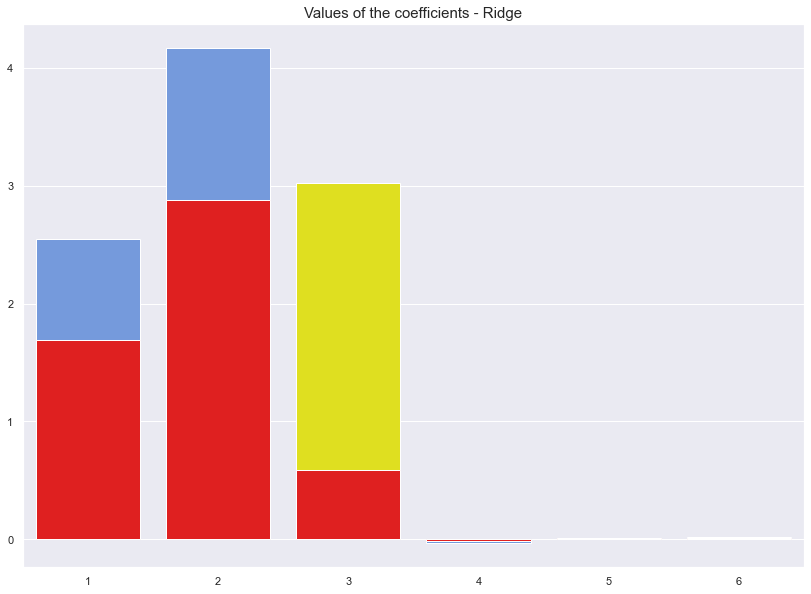

Lasso Intercept:[1.39309795 1.61093896 1.59511783]
Lasso Coefficient:[[ 1.98318374  3.60216209  1.74522469 -0.          0.          0.        ]
 [ 0.08263785  0.99144608  2.35471993 -0.          0.          0.        ]
 [ 1.09746204  2.27848434  0.         -0.          0.          0.        ]]
Lasso - RMSE : 1.3722466046311548
Lasso - RSquared : 0.9114305224410248


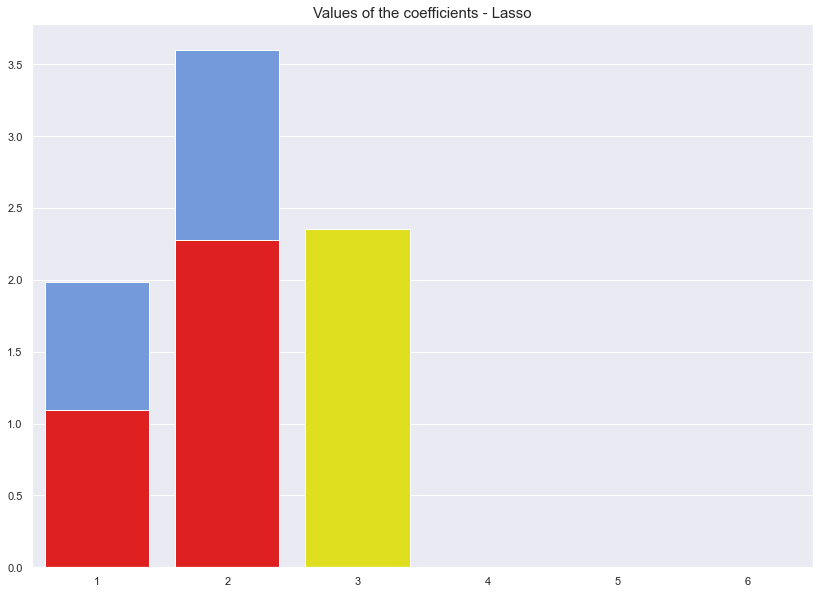

'====================alpha value : 0======================'

Ridge Intercept:[1.39309795 1.61093896 1.59511783]
Ridge Coefficient:[[ 2.55751116e+00  4.24493375e+00  2.46346556e+00 -2.21326726e-15
   0.00000000e+00  0.00000000e+00]
 [ 6.56955038e-01  1.63422005e+00  3.07296303e+00 -1.61552991e-15
  -1.16760553e-16 -4.73127035e-16]
 [ 1.70032452e+00  2.93733324e+00  5.87340020e-01 -8.91964806e-16
   5.19942280e-16 -7.60159891e-17]]
Ridge - RMSE : 3.714406210829166e-15
Ridge - RSquared : 1.0


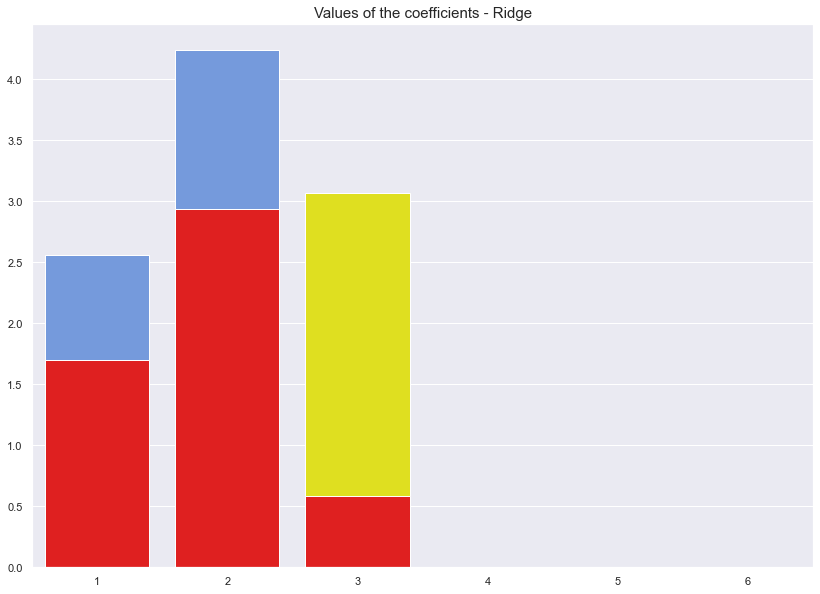

Lasso Intercept:[1.39309795 1.61093896 1.59511783]
Lasso Coefficient:[[ 2.55761995e+00  4.24488584e+00  2.46342457e+00 -3.95439362e-05
  -4.86027769e-06 -1.38625380e-05]
 [ 6.56888255e-01  1.63424853e+00  3.07297099e+00  5.50664104e-06
  -2.43685673e-06  4.96493619e-06]
 [ 1.70042889e+00  2.93728787e+00  5.87301562e-01 -3.68780750e-05
  -4.50538736e-06 -1.32511206e-05]]
Lasso - RMSE : 8.570732310829037e-05
Lasso - RSquared : 0.9999999996824102


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


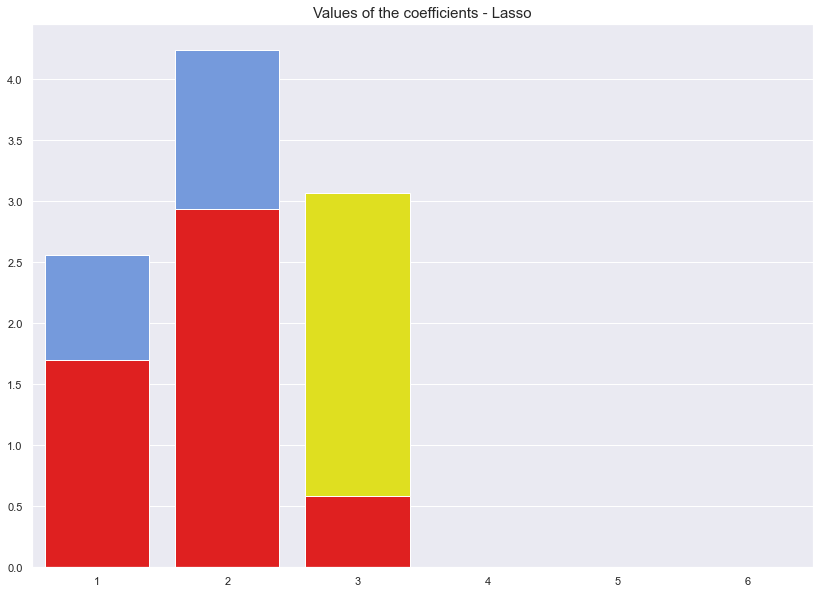

'====================alpha value : 0.01======================'

Ridge Intercept:[1.39309795 1.61093896 1.59511783]
Ridge Coefficient:[[ 2.55742304e+00  4.24411203e+00  2.46322164e+00 -2.93918868e-04
   1.29384926e-04  1.78168204e-04]
 [ 6.57093215e-01  1.63392881e+00  3.07244854e+00 -1.87683017e-04
  -5.65802942e-06  4.77858037e-07]
 [ 1.70022489e+00  2.93673193e+00  5.87380833e-01 -1.75897554e-04
   1.17810272e-04  1.53113448e-04]]
Ridge - RMSE : 0.0006745596530491141
Ridge - RSquared : 0.9999999818350753


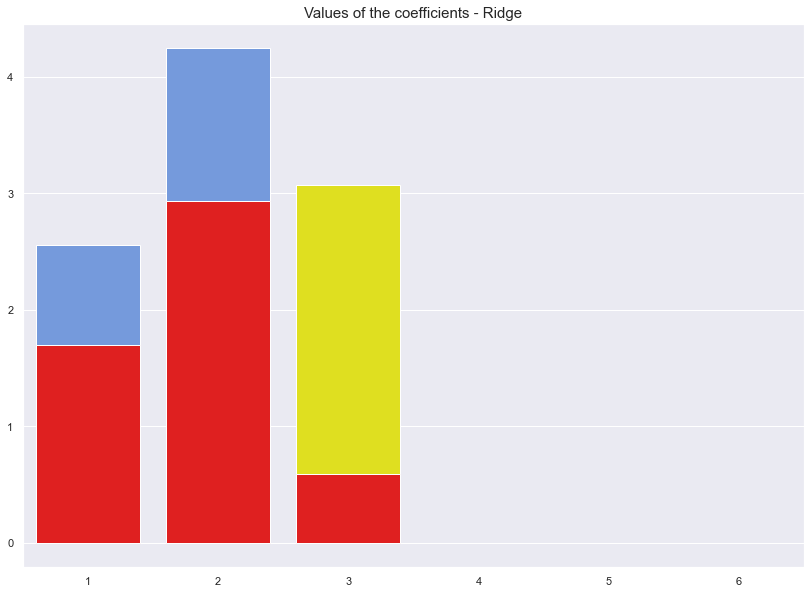

Lasso Intercept:[1.39309795 1.61093896 1.59511783]
Lasso Coefficient:[[ 2.55176628  4.23851963  2.45628082 -0.          0.          0.        ]
 [ 0.65121102  1.62779054  3.06578118 -0.          0.          0.        ]
 [ 1.69458551  2.930918    0.58015395 -0.          0.          0.        ]]
Lasso - RMSE : 0.01390671283626116
Lasso - RSquared : 0.9999908369847903


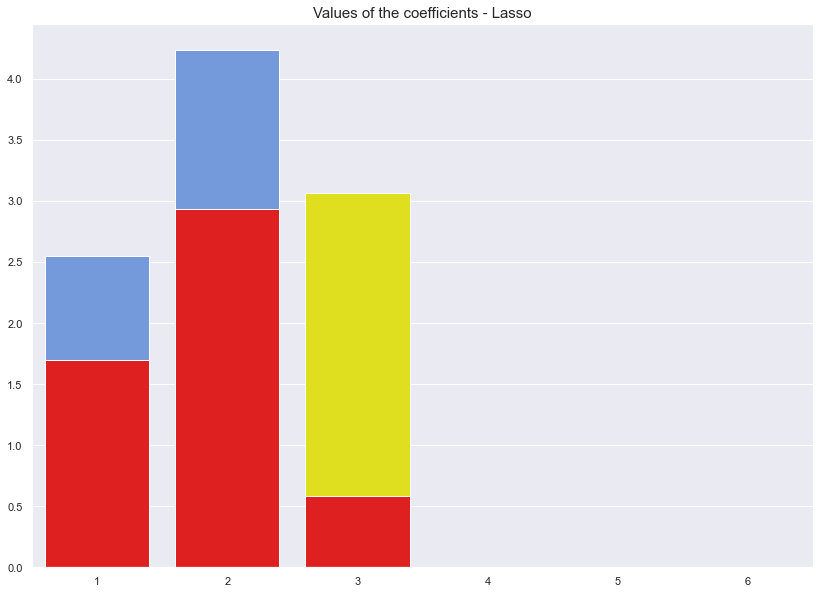

'====================alpha value : 0.001======================'

Ridge Intercept:[1.39309795 1.61093896 1.59511783]
Ridge Coefficient:[[ 2.55750236e+00  4.24485156e+00  2.46344117e+00 -2.94031624e-05
   1.29427204e-05  1.78222774e-05]
 [ 6.56968863e-01  1.63419092e+00  3.07291157e+00 -1.87760114e-05
  -5.66596521e-07  4.69414412e-08]
 [ 1.70031456e+00  2.93727310e+00  5.87344104e-01 -1.75964282e-05
   1.17851945e-05  1.53164753e-05]]
Ridge - RMSE : 6.746873413701916e-05
Ridge - RSquared : 0.9999999998182809


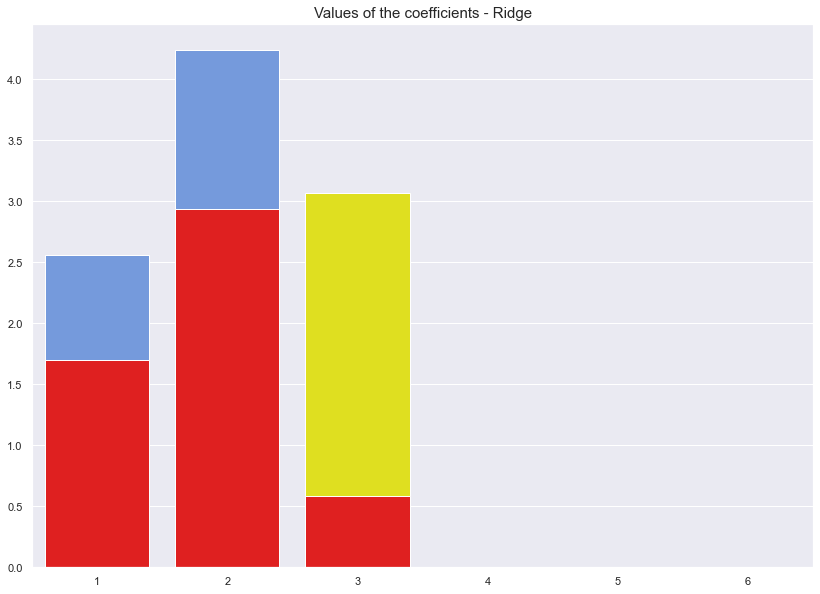

Lasso Intercept:[1.39309795 1.61093896 1.59511783]
Lasso Coefficient:[[ 2.55695401  4.24429433  2.46274212 -0.          0.          0.        ]
 [ 0.65637405  1.6335765   3.0722467  -0.          0.          0.        ]
 [ 1.69976617  2.93669369  0.58661692 -0.          0.          0.        ]]
Lasso - RMSE : 0.0013854515873824023
Lasso - RSquared : 0.9999999088702176


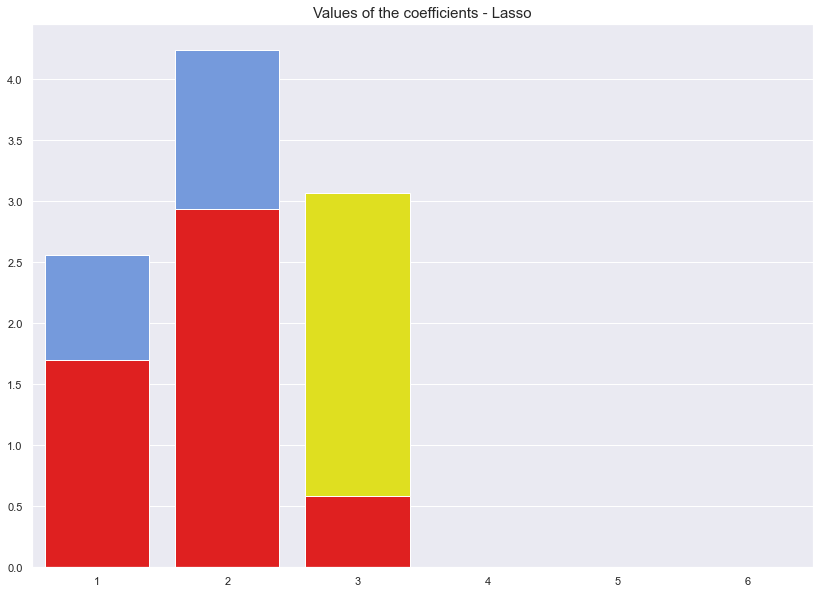

'====================alpha value : 1e-05======================'

Ridge Intercept:[1.39309795 1.61093896 1.59511783]
Ridge Coefficient:[[ 2.55751108e+00  4.24493293e+00  2.46346532e+00 -2.94044034e-07
   1.29431856e-07  1.78228778e-07]
 [ 6.56955176e-01  1.63421976e+00  3.07296251e+00 -1.87768600e-07
  -5.66683857e-09  4.68484709e-10]
 [ 1.70032442e+00  2.93733264e+00  5.87340061e-01 -1.75971625e-07
   1.17856531e-07  1.53170398e-07]]
Ridge - RMSE : 6.747013926260461e-07
Ridge - RSquared : 0.9999999999999818


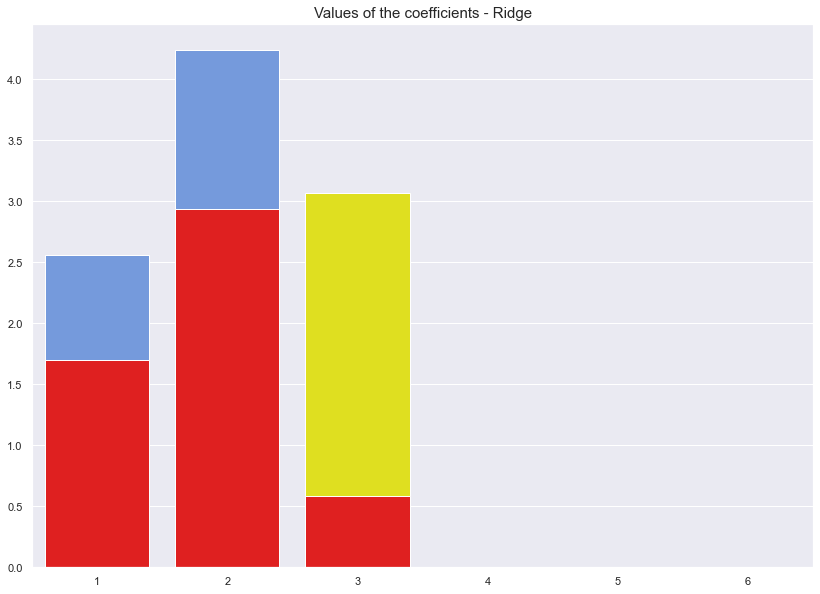

Lasso Intercept:[1.39309795 1.61093896 1.59511783]
Lasso Coefficient:[[ 2.55761018e+00  4.24487651e+00  2.46342235e+00 -2.68519226e-05
   0.00000000e+00 -0.00000000e+00]
 [ 6.56881888e-01  1.63424331e+00  3.07296609e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00]
 [ 1.70041912e+00  2.93727854e+00  5.87299343e-01 -2.41860614e-05
   0.00000000e+00 -0.00000000e+00]]
Lasso - RMSE : 8.362952604875247e-05
Lasso - RSquared : 0.9999999996898765


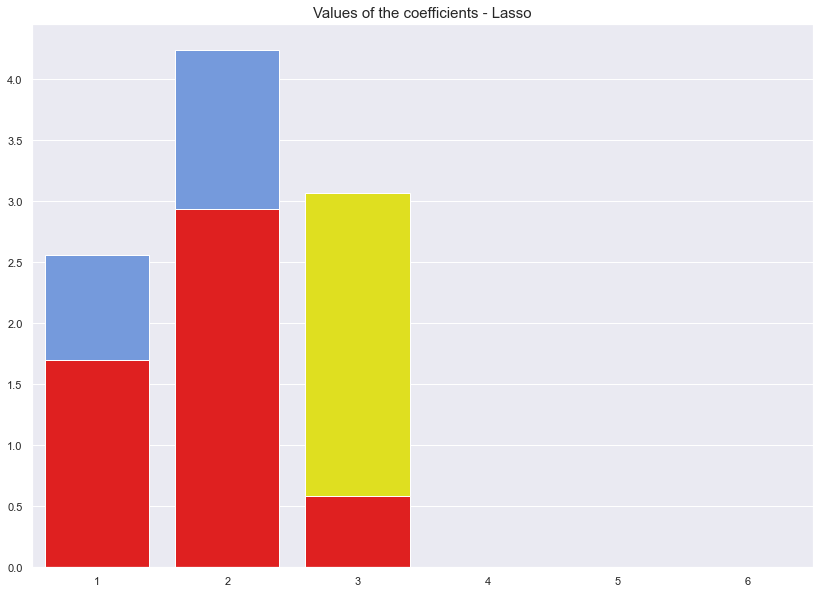

'====================alpha value : 1e-10======================'

Ridge Intercept:[1.39309795 1.61093896 1.59511783]
Ridge Coefficient:[[ 2.55751116e+00  4.24493375e+00  2.46346556e+00 -2.94189257e-12
   1.29438724e-12  1.78250299e-12]
 [ 6.56955038e-01  1.63422005e+00  3.07296303e+00 -1.87923188e-12
  -5.65679084e-14  4.34869456e-15]
 [ 1.70032452e+00  2.93733324e+00  5.87340020e-01 -1.76021324e-12
   1.17902813e-12  1.53168694e-12]]
Ridge - RMSE : 6.747586043507972e-12
Ridge - RSquared : 1.0


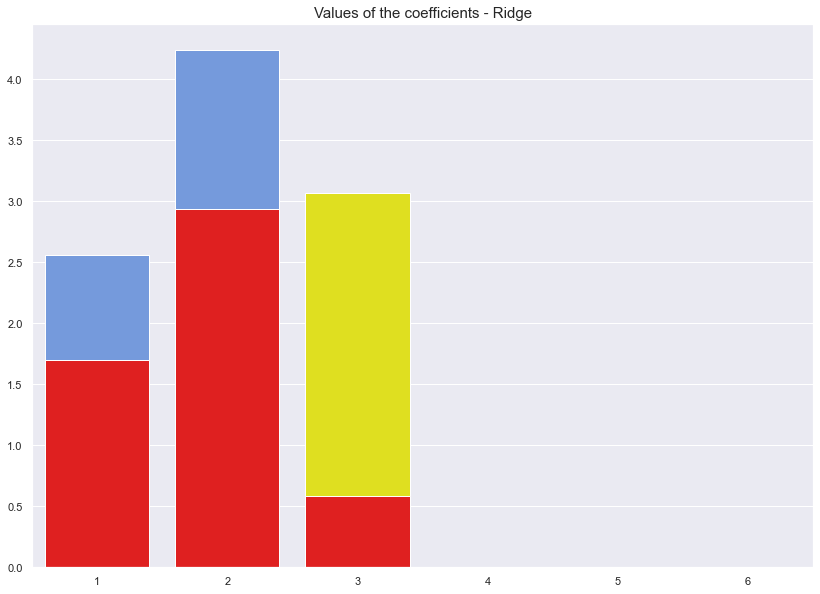

Lasso Intercept:[1.39309795 1.61093896 1.59511783]
Lasso Coefficient:[[ 2.55761995e+00  4.24488584e+00  2.46342457e+00 -3.95438093e-05
  -4.86011882e-06 -1.38623766e-05]
 [ 6.56888255e-01  1.63424853e+00  3.07297099e+00  5.50654831e-06
  -2.43676606e-06  4.96484469e-06]
 [ 1.70042889e+00  2.93728787e+00  5.87301562e-01 -3.68779481e-05
  -4.50522849e-06 -1.32509592e-05]]
Lasso - RMSE : 8.570727988629212e-05
Lasso - RSquared : 0.9999999996824105


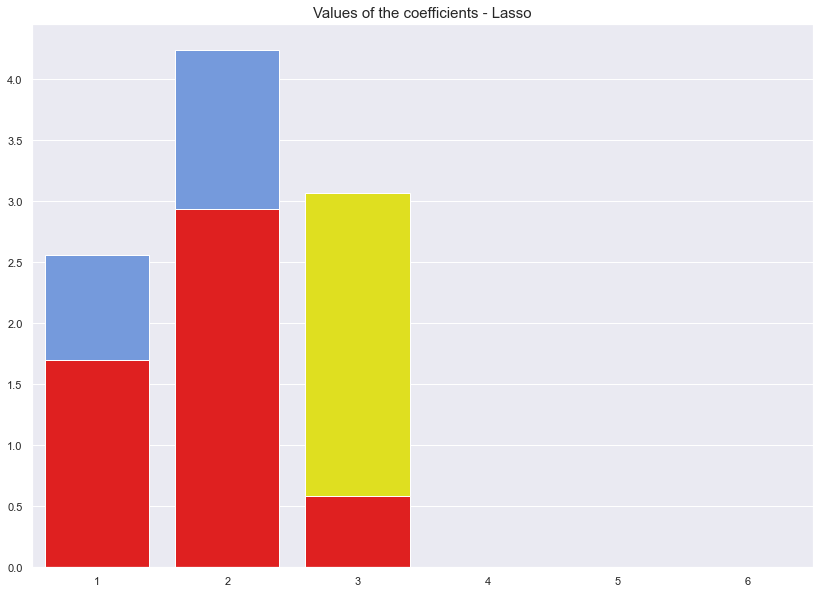

In [246]:
for alpha in alpha_iter:
    analyze_performance(alpha, X_test, Y_test,'test')

In [247]:
df_analyzer = pd.DataFrame(df_analyzer)

#### Performance measure for different alpha value for Ridge Regression

In [248]:
display(df_analyzer[df_analyzer['Type of Regression'] == 'Ridge'].sort_values(by=['Alpha'],ascending=False))

,Alpha,Type of Regression,TypeofData,RMSE,RSquared,Coefficient_Y1,Coefficient_Y2,Coefficient_Y3
0,1.000000e+02,Ridge,train,1.358217e+00,0.930492,"[2.3476518996497457, 2.876375684670994, 2.3573...","[0.868339920789504, 1.0210889096603606, 2.8258...","[1.4679663895140265, 2.0194428711859977, 0.603..."
16,1.000000e+02,Ridge,test,2.674476e+00,0.723998,"[1.4101580591828373, 1.741046912887555, 1.2176...","[0.5524962890452586, 0.7277219250815232, 1.222...","[0.884932785646748, 1.1542393592718454, 0.4319..."
2,1.000000e+01,Ridge,train,1.896905e-01,0.998632,"[2.750100804516381, 3.9995810691139657, 3.1498...","[0.7654294065923053, 1.518881513496651, 3.9057...","[1.8078523350490219, 2.774820231693781, 0.7590..."
18,1.000000e+01,Ridge,test,5.655193e-01,0.987318,"[2.428102611198896, 3.5991508506867618, 2.2397...","[0.7337876971167958, 1.407461083789547, 2.6420...","[1.5853527992308871, 2.46621602524401, 0.60585..."
4,1.000000e+00,Ridge,train,1.986065e-02,0.999985,"[2.7810537319010917, 4.179909874100794, 3.2654...","[0.720938543220444, 1.6068327981816792, 4.0708...","[1.8466650793686712, 2.8931615865559865, 0.779..."
20,1.000000e+00,Ridge,test,6.609406e-02,0.999826,"[2.5480576408404123, 4.165012943729693, 2.4392...","[0.6699454963550113, 1.605940741546701, 3.0225...","[1.6900897227953229, 2.878862361537189, 0.5911..."
8,1.000000e-02,Ridge,train,1.996601e-04,1.000000,"[2.784091608676206, 4.2010765515155795, 3.2788...","[0.7152238056848014, 1.6173119833075904, 4.090...","[1.850940207533339, 2.9069940630188276, 0.7817..."
24,1.000000e-02,Ridge,test,6.745597e-04,1.000000,"[2.557423038398534, 4.2441120305875275, 2.4632...","[0.6570932151112803, 1.6339288096179014, 3.072...","[1.7002248940486544, 2.936731929420949, 0.5873..."
10,1.000000e-03,Ridge,train,1.996698e-05,1.000000,"[2.784118840252404, 4.201270281972089, 3.27898...","[0.715171027095384, 1.617408047189645, 4.09024...","[1.8509790657958383, 2.9071206093172965, 0.781..."
26,1.000000e-03,Ridge,test,6.746873e-05,1.000000,"[2.55750235754441, 4.244851561384966, 2.463441...","[0.6569688634018306, 1.6341909218661415, 3.072...","[1.7003145576596217, 2.9372730961716487, 0.587..."


#### Performance measure for different alpha value for Lasso Regression

In [249]:
display(df_analyzer[df_analyzer['Type of Regression'] == 'Lasso'].sort_values(by=['Alpha'],ascending=False))

,Alpha,Type of Regression,TypeofData,RMSE,RSquared,Coefficient_Y1,Coefficient_Y2,Coefficient_Y3
1,1.000000e+02,Lasso,train,5.193784,3.700743e-17,"[0.0, 0.0, 0.0, -0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, -0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, -0.0, 0.0, 0.0]"
17,1.000000e+02,Lasso,test,5.144272,3.700743e-17,"[0.0, 0.0, 0.0, -0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, -0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, -0.0, 0.0, 0.0]"
3,1.000000e+01,Lasso,train,5.193784,3.700743e-17,"[0.0, 0.0, 0.0, -0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, -0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, -0.0, 0.0, 0.0]"
19,1.000000e+01,Lasso,test,5.144272,3.700743e-17,"[0.0, 0.0, 0.0, -0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, -0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, -0.0, 0.0, 0.0]"
5,1.000000e+00,Lasso,train,1.525856,8.966788e-01,"[2.247981344394256, 3.257986237661146, 2.35913...","[0.17902063797048792, 0.6741145713199252, 3.17...","[1.272853404199878, 1.9829813715261075, 0.0, -..."
21,1.000000e+00,Lasso,test,1.372247,9.114305e-01,"[1.9831837445219023, 3.6021620893225625, 1.745...","[0.08263785000497917, 0.9914460784036976, 2.35...","[1.0974620433284297, 2.2784843370870727, 0.0, ..."
9,1.000000e-02,Lasso,train,0.015482,9.999892e-01,"[2.778809376666151, 4.191841406632505, 3.26978...","[0.7098395578051063, 1.6079729666501252, 4.081...","[1.8456350511839668, 2.8976969735170033, 0.772..."
25,1.000000e-02,Lasso,test,0.013907,9.999908e-01,"[2.5517662792346516, 4.238519634254582, 2.4562...","[0.6512110178143502, 1.6277905355000712, 3.065...","[1.6945855126308917, 2.9309180030798228, 0.580..."
11,1.000000e-03,Lasso,train,0.001544,9.999999e-01,"[2.783619165441609, 4.200336545035706, 3.27806...","[0.7146537091289328, 1.6164666069624045, 4.089...","[1.8504562163409009, 2.9061881850825495, 0.780..."
27,1.000000e-03,Lasso,test,0.001385,9.999999e-01,"[2.556954013337061, 4.244294333262936, 2.46274...","[0.6563740456138683, 1.6335765010370686, 3.072...","[1.6997661713062797, 2.9366936938129062, 0.586..."


#### Effect of regularization term (α) : 
1. We have used set of 8 different alpha values 100,10,1,0,0.01,0.001,0.00001,0.0000000001 and compare the RMSE and RSqaured value for both Ridge and Lasso regression.
2. In case of Ridge regression the R Squared does not improve any significant value as alpha value decrease, but in case of Lasso regression with higher value of alpha RSquared value is very poor but as and when the alpha value decrease there is significant improvement in the performance has been observed.
3. As the alpha value is decreasing we can see the RMSE reduce and coefficient terms are approximately matching for both Lasso and Ridge regression.

###### Q4 Compare both models and elaborate on your findings 

#### Observation :
1. Looking at the Lasso and Ridge regression it is clear that both the model is approximately performing same on the given data set. Only thing we can notice is that as per theoritical understanding Lasso regression is penalizing the unimportatnt features by making there coefficent to zero, where as in Ridge regression the same features are identified as unimportant and there corresponding coefficient is moved closed to zero but not converge to zero.
2. With higher value of tuning parameter(alpha) Lasso regresion is performing very poorly which can be observed looking at the RSquared value but Ridge regression perform even decently with high  tuning parameter value.